Starting Point: EDA and some data cleansing.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.cluster.hierarchy as sch


df = pd.read_csv('customer_segmentation.csv')
df.drop(columns = 'customer_unique_id',inplace= True)
df.columns





Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_category_name_english'],
      dtype='object')

Now we want to see which columns contains categorical values, so that we will be able to use OneHotEncoder on those columns

In [3]:
#Checking the features that are categorical

categorical_features = df.select_dtypes(include='O').keys()

#Displaying those features

categorical_features

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'shipping_limit_date', 'seller_city', 'seller_state',
       'product_category_name', 'product_category_name_english'],
      dtype='object')

We want to use OneHotEncoder only on the unique features, because otherwise we would get a non-sense giant dataset with thousands of columns.

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(sparse= False), ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name','product_category_name_english']),
    remainder='passthrough')

encoded_df = transformer.fit_transform(df)
encoded_df = pd.DataFrame(
    encoded_df, 
    columns=transformer.get_feature_names()
)

encoded_df.head()




c:\Users\aless\anaconda3\envs\spyder-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_canceled,onehotencoder__x0_delivered,onehotencoder__x0_invoiced,onehotencoder__x0_processing,onehotencoder__x0_shipped,onehotencoder__x1_boleto,onehotencoder__x1_credit_card,onehotencoder__x1_debit_card,onehotencoder__x1_voucher,onehotencoder__x2_abaete,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,29,178
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5,135.82,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,29,178
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,128.04,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,29,178
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,279.3,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,29,178
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,279.3,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,29,178


Using pandas 'get_dummies' instead of OHE

In [5]:
dummies_df = pd.get_dummies(df, columns = ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name','product_category_name_english'])

dummies_df.head()



,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,order_item_id,...,product_category_name_english_pet_shop,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,141.46,1,...,0,0,0,0,0,0,0,0,0,0
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,5,135.82,1,...,0,0,0,0,0,0,0,0,0,0
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,1,128.04,1,...,0,0,0,0,0,0,0,0,0,0
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,2,279.30,1,...,0,0,0,0,0,0,0,0,0,0
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,2,279.30,2,...,0,0,0,0,0,0,0,0,0,0


RFM analysis: RFM stands for Frequency (The frequency of purchases of a customer), Recency (How long has been since the last purchace of a customer), Monetary (How much a customer has spent). We will firstly calculate the frequency and generate a new dataset containg 2 columns (CustomerName and Frequency). Note that we will use the original dataframe because we don't need any of the categorical features in order to calculate the RFM values.

In [6]:
frequencies = df.groupby(
    by=['customer_id'], as_index=False)['order_purchase_timestamp'].count()
frequencies.columns = ['Frequencies Customer ID', 'Frequency']
frequencies.head()

,Frequencies Customer ID,Frequency
0,001051abfcfdbed9f87b4266213a5df1,3
1,0013cd8e350a7cc76873441e431dd5ee,1
2,0015bc9fd2d5395446143e8b215d7c75,1
3,0018c09f333634ca9c80d9ff46e43e9c,1
4,001df1ee5c36767aa607001ab1a13a06,1


Creating the monetary dataset:

In [7]:
df['Orders_value'] = df['payment_value']
monetary = df.groupby(by='customer_id', as_index=False)['Orders_value'].sum()
monetary.columns = [' Monetary Customer ID', 'Monetary value']
monetary.head()

,Monetary Customer ID,Monetary value
0,001051abfcfdbed9f87b4266213a5df1,65.20
1,0013cd8e350a7cc76873441e431dd5ee,92.60
2,0015bc9fd2d5395446143e8b215d7c75,132.19
3,0018c09f333634ca9c80d9ff46e43e9c,56.87
4,001df1ee5c36767aa607001ab1a13a06,42.86


Creating the recency dataset (note that the INT value containted in the 'recency' column shows the number of days since the last purchase of a user)

In [8]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

recency = df.groupby(by='customer_id',
                        as_index=False)['order_purchase_timestamp'].max()

recency.columns = ['Customer ID', 'Lastest Purchase']

recent_date = recency['Lastest Purchase'].max()

recency['Recency'] = recency['Lastest Purchase'].apply(
    lambda x: (recent_date - x).days)
    
recency.head()


,Customer ID,Lastest Purchase,Recency
0,001051abfcfdbed9f87b4266213a5df1,2018-05-30 09:19:31,91
1,0013cd8e350a7cc76873441e431dd5ee,2018-05-07 23:25:09,113
2,0015bc9fd2d5395446143e8b215d7c75,2018-06-11 19:48:34,78
3,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01 18:07:57,58
4,001df1ee5c36767aa607001ab1a13a06,2018-08-05 23:14:45,23


After that we have created the three different dataframe we want to concatenate them in order to have a single, clean and understanble dataset.

In [9]:
rfm_dataset = None

rfm_dataset = pd.DataFrame(rfm_dataset)

rfm_dataset = pd.concat([recency,monetary,frequencies], axis = 1)

cols = [3,5]

rfm_dataset = rfm_dataset.drop(rfm_dataset.columns[cols],axis = 1)

rfm_dataset.head()





,Customer ID,Lastest Purchase,Recency,Monetary value,Frequency
0,001051abfcfdbed9f87b4266213a5df1,2018-05-30 09:19:31,91,65.20,3
1,0013cd8e350a7cc76873441e431dd5ee,2018-05-07 23:25:09,113,92.60,1
2,0015bc9fd2d5395446143e8b215d7c75,2018-06-11 19:48:34,78,132.19,1
3,0018c09f333634ca9c80d9ff46e43e9c,2018-07-01 18:07:57,58,56.87,1
4,001df1ee5c36767aa607001ab1a13a06,2018-08-05 23:14:45,23,42.86,1


## Distribution



### Pairplot

To see and understand better the dataset, we now calculate the pairplot and see the various correlation between the different columns.

In [23]:
columns=["payment_type","payment_installments","payment_value","customer_state","product_category_name_english"]
sns.pairplot(encoded_df[columns])


KeyError: "['payment_type', 'customer_state', 'product_category_name_english'] not in index"

We will start with the k-means algorithm for clustering. First thing first we need to define the optimal amount of cluster to pass to our algorithm in order to maximize the efficecny.

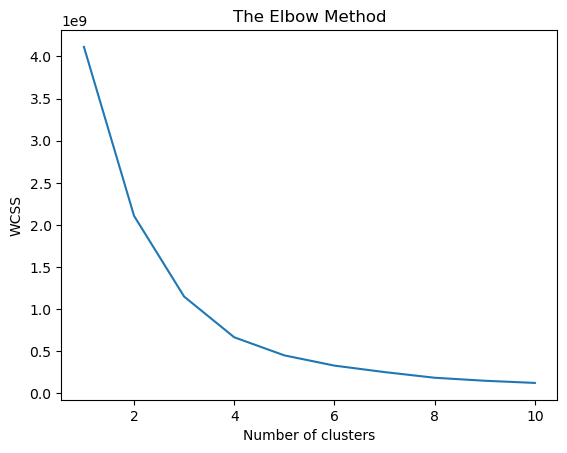

In [10]:
from sklearn.cluster import KMeans

features = ['Recency','Monetary value','Frequency']
X = rfm_dataset[features]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()





From the elbow method we can see that 4 is the best number of clusters.

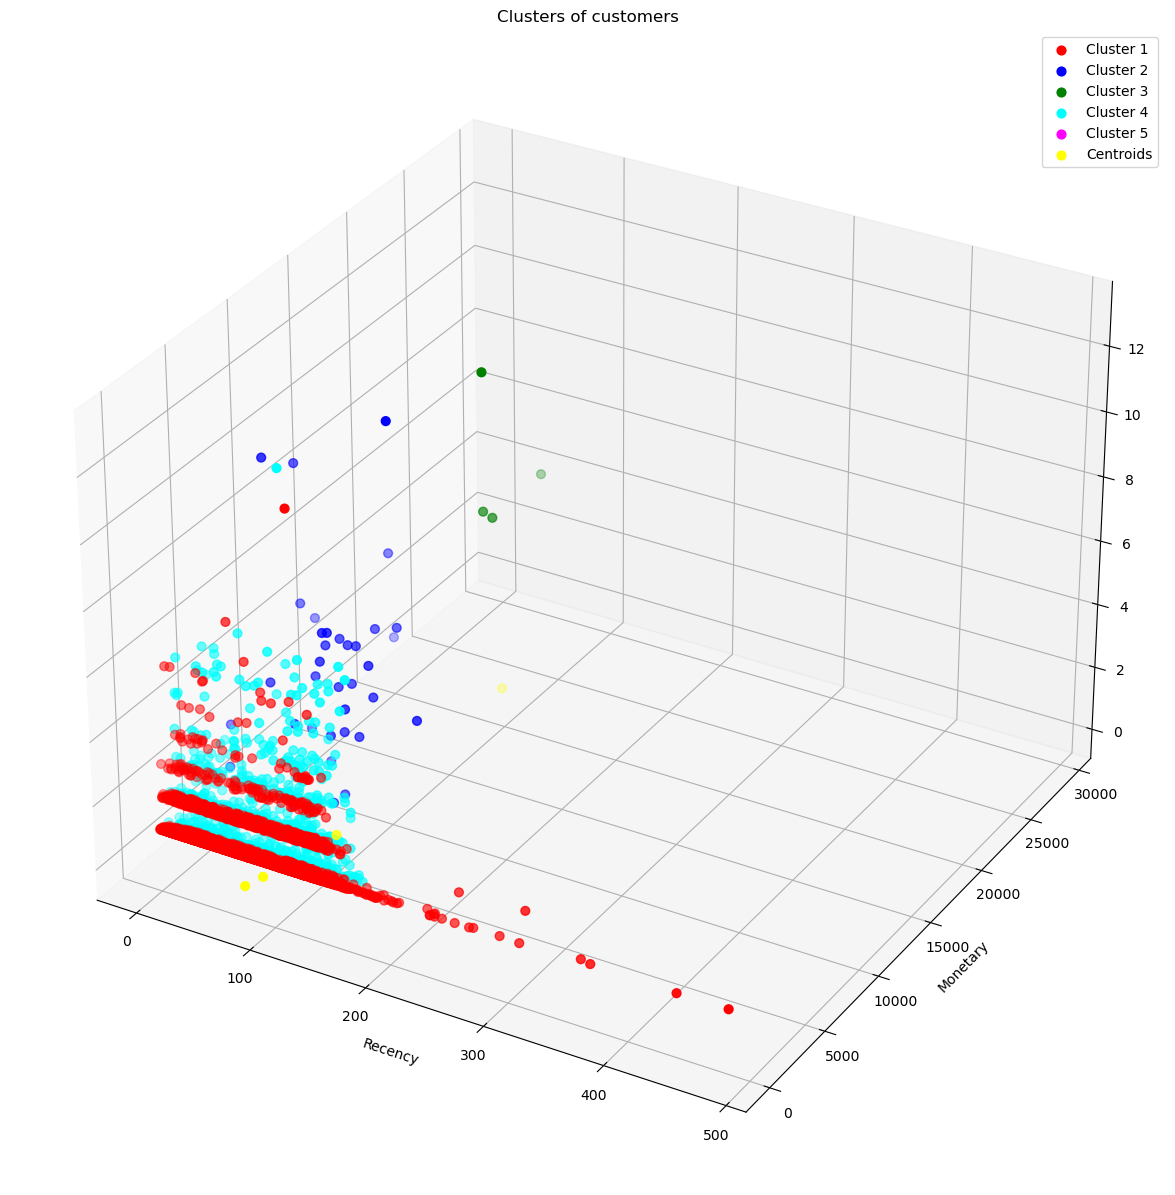

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

# Visualising the clusters
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],X[y_kmeans == 0,2], s = 40, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],X[y_kmeans == 1,2], s = 40, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],X[y_kmeans == 2,2], s = 40, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],X[y_kmeans == 3,2], s = 40, c = 'cyan', label = 'Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],X[y_kmeans == 4,2], s = 40, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
#plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'orange', label = 'Cluster 7')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

HC clustering:

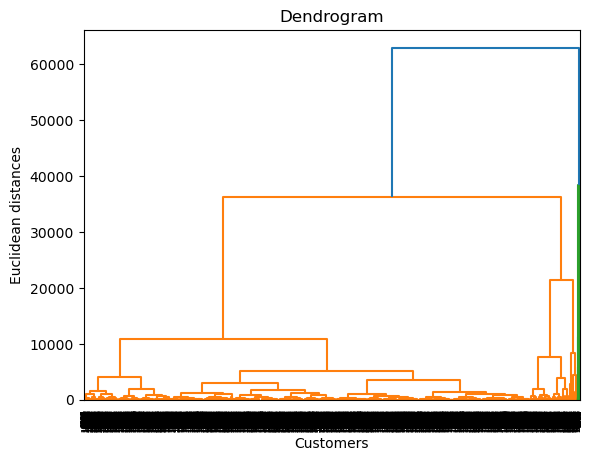

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# Ward's method: distance between two clusters A and B is how much the sum of squares will increase when we merge them
# single for min distance
# complete for max distance
# average for centroid distance
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



4 clusters

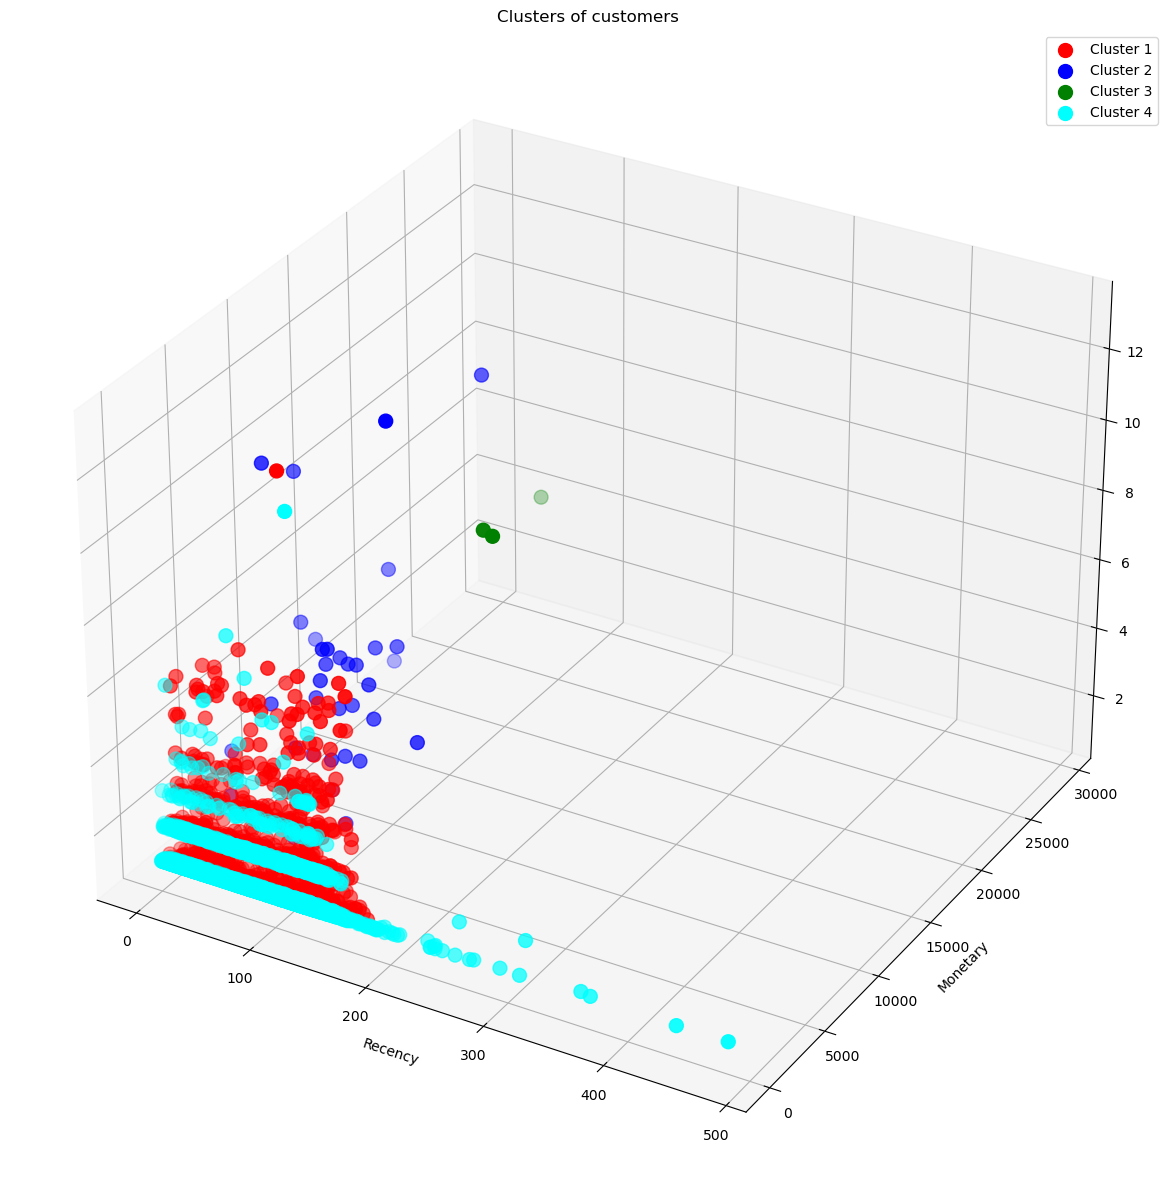

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0,2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2,2], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], X[y_hc == 3,2], s = 100, c = 'cyan', label = 'Cluster 4')


plt.title('Clusters of customers')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

Due to how the data is scattered, we think that a good solution could be too use Kernel SVM. By looking at the 3D plot, we see that the various clusters could be diveded by a hyperplane.

In [ ]:
listgreedy = []
listlpa = []
Nodesund = list(X.nodes())
for node in Nodesund:
    for k,v in clustersmod_opt.items():
        if node in v:
            listgreedy.append(k) 
    for k,v in clusterslp.items():
        if node in v: 
            listlpa.append(k)


In [20]:
from sklearn.cluster import spectral_clustering
X=np.array(X)
spectral = spectral_clustering( n_clusters= 4, random_state=42, n_init=20, affinity="rbf")
sc = spectral.fit_predict(X)


'spectral = spectral_clustering( n_clusters= 4, random_state=42, n_init=20, affinity="rbf")\nsc = spectral.fit_predict(X)'

The dataframe does not present missing data, so no data imputation is needed. Even if the describe method has already provided this info, we nevertheless check for some null entries and some duplicates; another important thing is to see whether some customers have made multiple orders and if so, look for the customers' orders distribution by drawing a simple(but effective) histogram.

"x = [i for i in range(len(df.index))]\ny = orderdistr['N.orders']\nplt.plot(x)"

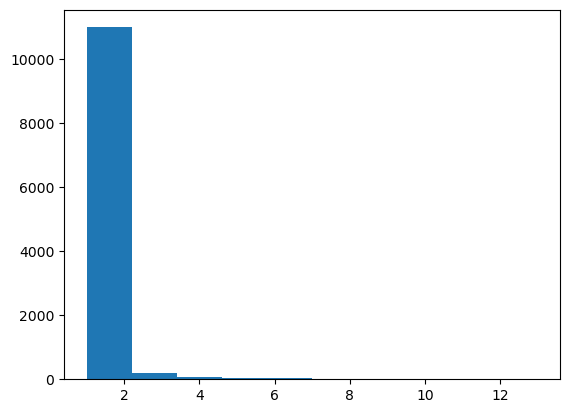

In [31]:
df.isnull()
orderdistr = df.groupby(['customer_id'])['customer_id'].count().reset_index(name='N.orders').sort_values(['N.orders'], ascending = False)
numorder=list(orderdistr["N.orders"])
plt.hist(x=numorder)



"""x = [i for i in range(len(df.index))]
y = orderdistr['N.orders']
plt.plot(x)""" 

(array([4.013e+03, 3.342e+03, 3.801e+03, 2.140e+02, 1.200e+01, 5.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  0. ,  48.1,  96.2, 144.3, 192.4, 240.5, 288.6, 336.7, 384.8,
        432.9, 481. ]),
 <BarContainer object of 10 artists>)

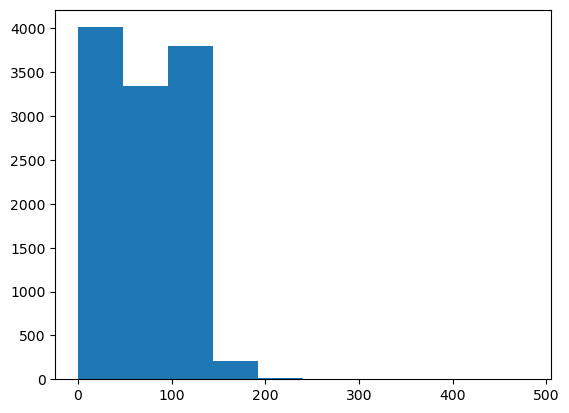

In [32]:
recencydist=list(recency["Recency"])
plt.hist(x=recencydist)

<AxesSubplot:xlabel='payment_installments', ylabel='Count'>

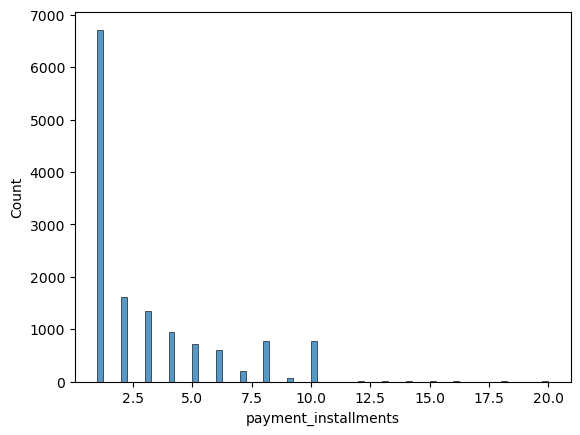

In [43]:
sns.histplot(data=df["payment_installments"])

<AxesSubplot:xlabel='payment_type', ylabel='Count'>

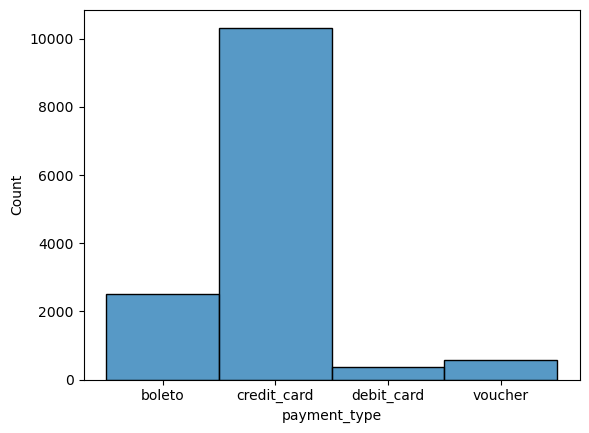

In [45]:
sns.histplot(data=df["payment_type"])

0             perfumery
1             perfumery
2             perfumery
3             perfumery
4             perfumery
              ...      
13796    books_imported
13797    books_imported
13798    books_imported
13799    books_imported
13800    books_imported
Name: product_category_name_english, Length: 13801, dtype: object

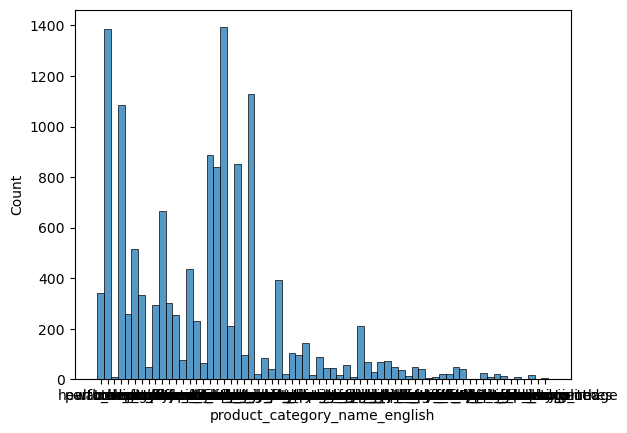

In [79]:
dfcat=df["product_category_name_english"]
display(dfcat) 
dfcat.columns=["products_cat_name"]
dfcat.head() 
ax.set(xlabel=None)
ax = sns.histplot(df['product_category_name_english'])


Text(0.5, 1.0, 'Price Distriburion')

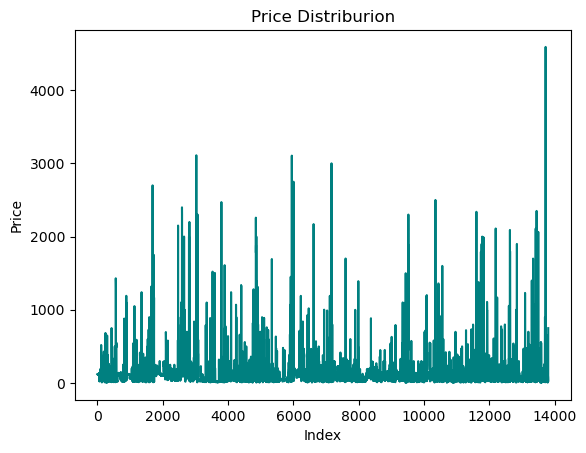

In [91]:
y=df["price"]
x=[i for i in range(len(df))]
plt.plot(x,y, color="#008080")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Price Distriburion")

Text(0.5, 1.0, 'Average Spending Distriburion by Payment Type')

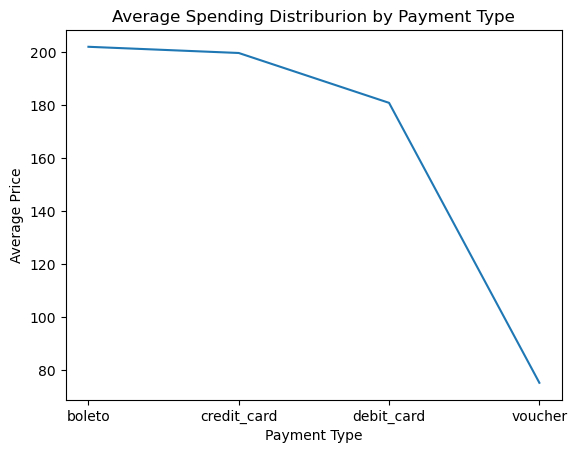

In [105]:
paymentdistr = df.groupby(['payment_type'])['payment_value'].mean().reset_index(name='Avg_Spending').sort_values(['Avg_Spending'], ascending = False)
x=["boleto","credit_card","debit_card","voucher"]
y=paymentdistr["Avg_Spending"]
plt.plot(x,y)
plt.xlabel("Payment Type")
plt.ylabel("Average Price")
plt.title("Average Spending Distriburion by Payment Type")

As you can see, people who have done an order with the voucher tend to spend less due to the promotion. Instead people who use a boleto spend much more. There isn't much difference between the credit card spending and the debit card while they spend a little bit less then users who use a boleto. This could be because there might be a promotion for those who use a credit or debit card. As we have seen before, the credit card is used much more and this then conferms that the credit card might have some advantages in terms of promotion or discounts.

As we can clearly see by looking at the head of the dataframe as well as at the columns, there are multiple attributes in which we are not interested at all: it is them important to identify those which can distinguish consumer behaviour: let us try with 

In [ ]:
df2 = df.iloc[:,[11,12,10,9,18,22,14]]
df2.drop_duplicates(inplace = True)
df2.shape


C:\Users\Tommy\AppData\Local\Temp\ipykernel_27252\1602337437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace = True)


(13702, 7)

What we can do now is to understand the distribution of the customers and how often they purchased. The group by function is grouping by the number of purchases and shows it in a different column!

In [ ]:
n_orders = df2.groupby(['customer_unique_id'])['customer_unique_id'].count().reset_index(name='N.orders').sort_values(['N.orders'], ascending = False)

Below we perform some data visualization to understand the distribution of the order and customers' ID, as we are eager to see if some customers have made constant orders.

In [ ]:
df2.rename(columns= {
    'customer_unique_id': 'Id',
    'payment_value' : 'totpayorder',
    'payment_installments' : 'installments',
    'order_item_id': 'nitems',
    }, inplace = True)

#check for unique id
print(df2.shape,'vs', df2['Id'].nunique())
df2.head()

(13702, 7) vs 11247


C:\Users\Tommy\AppData\Local\Temp\ipykernel_27252\1618856450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns= {


,Id,customer_city,totpayorder,installments,price,product_category_name,nitems
0,af07308b275d755c9edb36a90c618231,barreiras,141.46,1,118.7,perfumaria,1
1,8b8028d453a01986b48c4271cc341475,ituverava,135.82,5,116.9,perfumaria,1
2,3edcab192482e9871c17b34cf98c3996,ribeirao das neves,128.04,1,118.7,perfumaria,1
3,958ac7760e5484df1496ba5833ab6117,gaspar,279.30,2,116.9,perfumaria,1
4,958ac7760e5484df1496ba5833ab6117,gaspar,279.30,2,116.9,perfumaria,2
